### INTRODUCTION

In the previous jupyter notebook, I worked around the python implementation of a **LINEAR REGRESSION ALGORITHM**.
- In this notebook, I will build a univariate linear regression algorithm for a medical cost data.
- The data is a multivariate dataset but I will focus my X to be Body Mass Index (BMI) and y will remain as Charge.
- The model will be predicting an individual's medical cost billed by health insurance taking BMI into thought.

### DATASET

Import required python library and dataset.

In [21]:
# Import Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [8, 5]
plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'
plt.style.use('seaborn-whitegrid')

In [22]:
# Import Data

df = pd.read_csv('dataset/insurance.csv')

print('Size of Dataset: ', df.shape)
df.head()

Size of Dataset:  (1338, 7)


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Observe:
- that m = 1338 training samples.
- that n = 7 variables.
- that chosen X feature = bmi.
- that chosem y target = charge.

Since this is a univariate linear regression project, we only need variables [bmi, charges].

In [23]:
# drop all columns except [bmi & charges].

new_df = df.filter(['bmi', 'charges'])
new_df

,bmi,charges
0,27.900,16884.92400
1,33.770,1725.55230
2,33.000,4449.46200
3,22.705,21984.47061
4,28.880,3866.85520
...,...,...
1333,30.970,10600.54830
1334,31.920,2205.98080
1335,36.850,1629.83350
1336,25.800,2007.94500


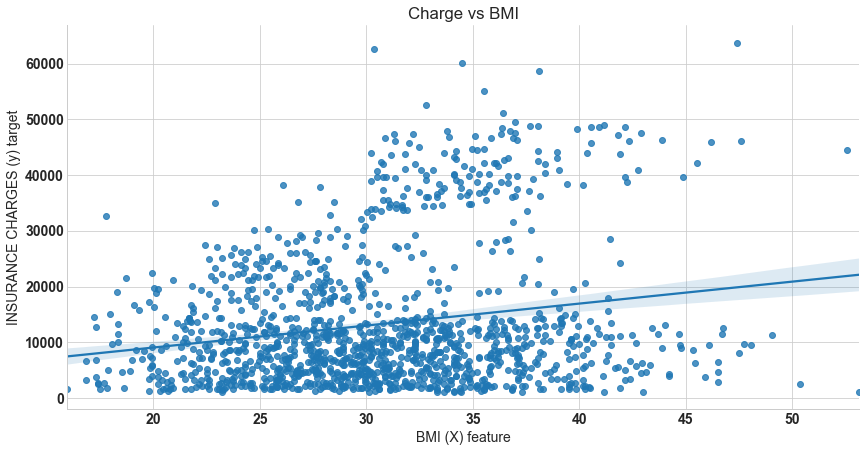

In [24]:
# For evaluation purpose, fit line between bmi as y and charges as x on an x-y plane.

def plot_line_of_fit(data):
    sns.lmplot(x = 'bmi', y = 'charges', data = df, aspect = 2, height = 6)
    plt.xlabel('BMI (X) feature')
    plt.ylabel('INSURANCE CHARGES (y) target')
    plt.title('Charge vs BMI')
    
plot_line_of_fit(new_df)

### EXPLORATORY DATA ANALYSIS (EDA)

In [25]:
new_df.describe()

,bmi,charges
count,1338.000000,1338.000000
mean,30.663397,13270.422265
std,6.098187,12110.011237
min,15.960000,1121.873900
25%,26.296250,4740.287150
50%,30.400000,9382.033000
75%,34.693750,16639.912515
max,53.130000,63770.428010


bmi        0
charges    0
dtype: int64


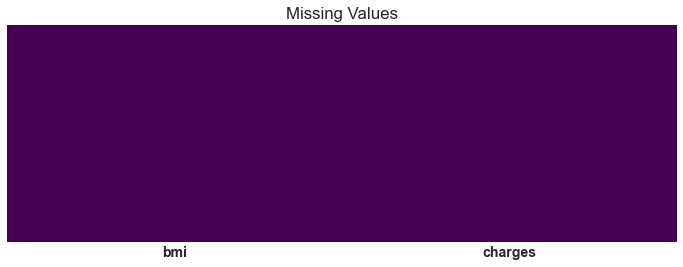

In [26]:
# Check and plot missing values.

def check_nan(data):
    nan = data.isnull().sum()
    print(nan)
    
    # Plot missing values using heatmap
    plt.figure(figsize = (12, 4))
    sns.heatmap(data.isnull(), cbar = False, cmap = 'viridis', yticklabels = False)
    plt.title('Missing Values')
    
check_nan(new_df)

- No missing values in the data.

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


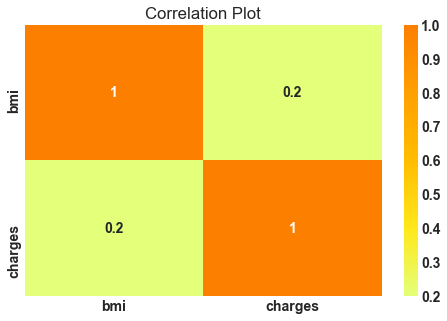

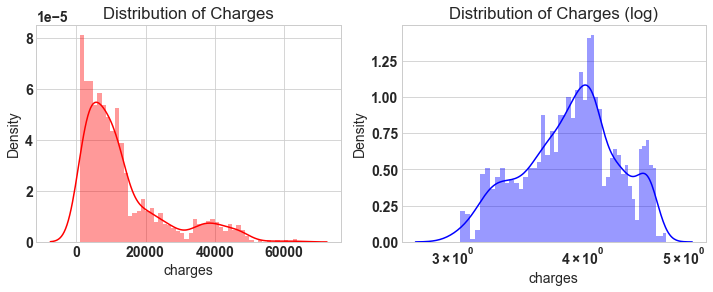

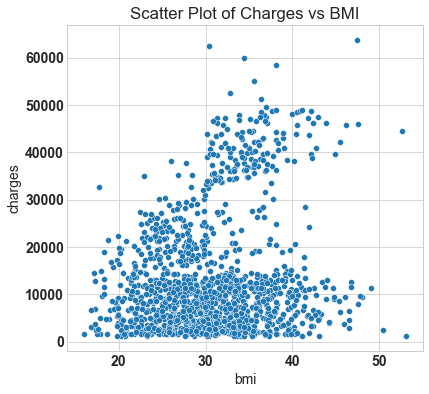

In [27]:
# Plots.

def plots(data):
    # Plot correlation between columns
    
    corr = new_df.corr()
    sns.heatmap(corr, cmap = 'Wistia', annot = True)
    plt.title('Correlation Plot')
    print('==============================================================================================================')
    
    # Plot charges distribution
    
    f = plt.figure(figsize = (12, 4))
    
    ax = f.add_subplot(121)
    sns.distplot(new_df['charges'], bins = 50, color = 'r', ax = ax)
    ax.set_title('Distribution of Charges')
    
    ax = f.add_subplot(122)
    sns.distplot(np.log10(new_df['charges']), bins = 50, color = 'b', ax = ax)
    ax.set_title('Distribution of Charges (log)')
    ax.set_xscale('log')
    print('============================================================================================================')
    
     # Scatter plot for bmi vs charges
    
    f = plt.figure(figsize = (14, 6))
    
    ax = f.add_subplot(121)
    sns.scatterplot(x = 'bmi', y = 'charges', data = data, palette = 'viridis')
    ax.set_title('Scatter Plot of Charges vs BMI')
    
    plt.savefig('scatter_plot.png')
    print('============================================================================================================')
    
plots(new_df)

**OBSERVATIONS:**

- Correlation Plot - there is no correlation between variables.
- Distribution Plot - The left plot is rightly skewed. The right plot needs the application of natural_log to tend to normal. Further analysis requires that log is applied to target variable (charges).
- Scatter Plot - BMI is a measure of body fat in humans using height and weight. Min is 15.9kg/m^2 and Max is 53kh/m^2.

### DATA PROCESSING

**LOG TRANSFORMATION**

This ia a way to transform a non-normal dependent variable into a normal shape.

In [45]:
new_df['charges'] = np.log(new_df['charges'])

### TRAIN TEST SPLIT

In [46]:
from sklearn.model_selection import train_test_split

X = new_df.drop('charges', axis = 1)
y = new_df['charges']
    
X_train,  X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### MODEL BUILDING

**Coming up with model parameters**

- Add a feature x = 1 to original data.
- Build the model.
- Retrieve parameter for model.

In [47]:
# Addin feature x0 = 1 to original data.

X_train_0 = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_0 = np.c_[np.ones((X_test.shape[0], 1)), X_test]

# Build model matrix.

theta = np.matmul(np.linalg.inv(np.matmul(X_train_0.T, X_train_0)), np.matmul(X_train_0.T, y_train))

# Retrieve model parameters

parameter = ['theta_' + str(i) for i in range(X_train_0.shape[1])]
columns = ['intersect: x_0 = 1'] + list(X.columns.values)
parameter_df = pd.DataFrame({'Parameter' : parameter, 'Columns' : columns, 'Theta' : theta})

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Parameter

sk_theta = [lin_reg.intercept_] + list(lin_reg.coef_)
parameter_df = parameter_df.join(pd.Series(sk_theta, name = 'Sklearn_theta'))
parameter_df

,Parameter,Columns,Theta,Sklearn_theta
0,theta_0,intersect: x_0 = 1,8.550217,8.550217
1,theta_1,bmi,0.017602,0.017602


**OBSERVATION**
- Parameters obtained from both models are the same.

### MODEL EVALUATION

- I will be predicting for target variable using model parameter for test data.
- I will then compare predicted value with actual value using MSE.

In [49]:
# Normal Eqn Method

y_pred_norm = np.matmul(X_test_0, theta)

# Evaluation using MSE

J_mse = np.sum((y_pred_norm - y_test) ** 2) / X_test_0.shape[0]

# R-squared
sse = np.sum((y_pred_norm - y_test) ** 2)
sst = np.sum((y_test - y_test.mean()) ** 2)

r_square = 1 - (sse / sst)

print('Mean Squared Error (MSE): ', J_mse)
print('R-square for Normal Equation: ', r_square)

Mean Squared Error (MSE):  0.8255706857562636
R-square for Normal Equation:  0.02732899414722134


In [50]:
y_pred_sk = lin_reg.predict(X_test)

# Evaluation using MSE
from sklearn.metrics import mean_squared_error

J_mse_sk = mean_squared_error(y_pred_sk, y_test)

# R-squared
r_square_sk = lin_reg.score(X_test, y_test)

print('Mean Squared Error (MSE): ', J_mse_sk)
print('R_square for Scikit Library: ', r_square_sk)

Mean Squared Error (MSE):  0.8255706857562617
R_square for Scikit Library:  0.027328994147223562
